## Spline's effectiveness in approximating volatile or higly oscillating functions

Spline interpolation is often considered a data-driven approach, where the shape of the interpolating function is influenced by the data distribution. This can lead to better generalization and less sensitivity to outliers.

High oscillations in a true function can lead to overshooting and undershooting when using interpolation methods like Lagrange. The interpolating polynomial might try to fit the peaks and troughs of the oscillations, resulting in a polynomial that doesn't closely follow the true behavior of the function.

Lagrange interpolation constructs a global polynomial that aims to fit the entire interval. This global nature can be a limitation when dealing with functions that exhibit localized volatility. The interpolating polynomial might not respond well to rapid changes within small intervals.

Piecewise interpolation methods, such as spline interpolation, can be more effective for functions with high oscillations. By breaking the interval into smaller segments and using lower-degree polynomials for each segment, splines offer smoother transitions between data points and can better capture localized volatility.

Let's again compare the performance of interpolations on such highly oscillating or volatile functions:

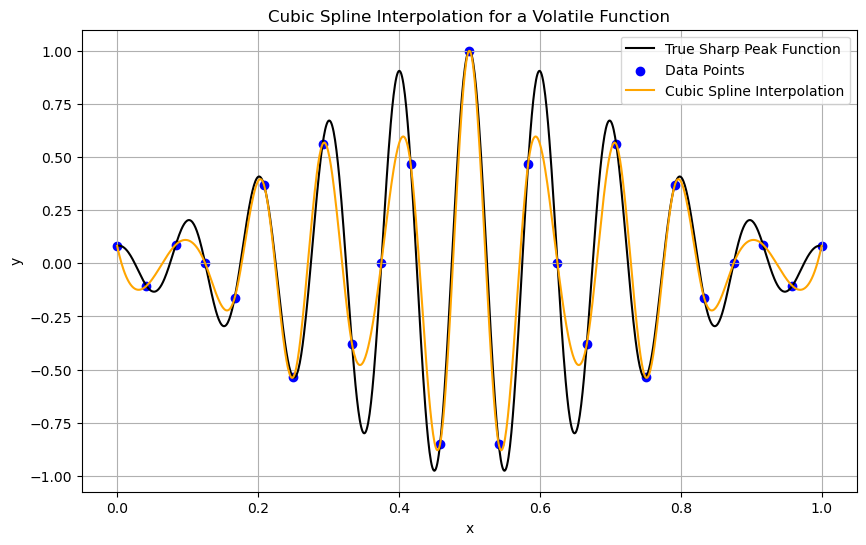

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline, lagrange

# Function with a sharp peak
def sharp_peak_function(x):
    return np.exp(-10 * (x - 0.5)**2) * np.cos(20 * np.pi * x)

# Generate data points from the sharp peak function
num_points = 25
x_data = np.linspace(0, 1, num_points)
y_data = sharp_peak_function(x_data)

# Choose a range for interpolation
interp_x = np.linspace(0, 1, 1000)

# Cubic spline interpolation
cubic_interp = CubicSpline(x_data, y_data)
y_cubic = cubic_interp(interp_x)

# Plot the results
plt.figure(figsize=(10, 6))

plt.plot(interp_x, sharp_peak_function(interp_x), label="True Sharp Peak Function", color='black')
plt.scatter(x_data, y_data, label="Data Points", color='blue')

plt.plot(interp_x, y_cubic, label="Cubic Spline Interpolation", color='orange')

plt.title("Cubic Spline Interpolation for a Volatile Function")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


With a relatievely high number of points to approximate a function with: 30 in our case, Spline does a great job even for a highly oscillating functions. However, as noted, we need more points which inreases computation time.

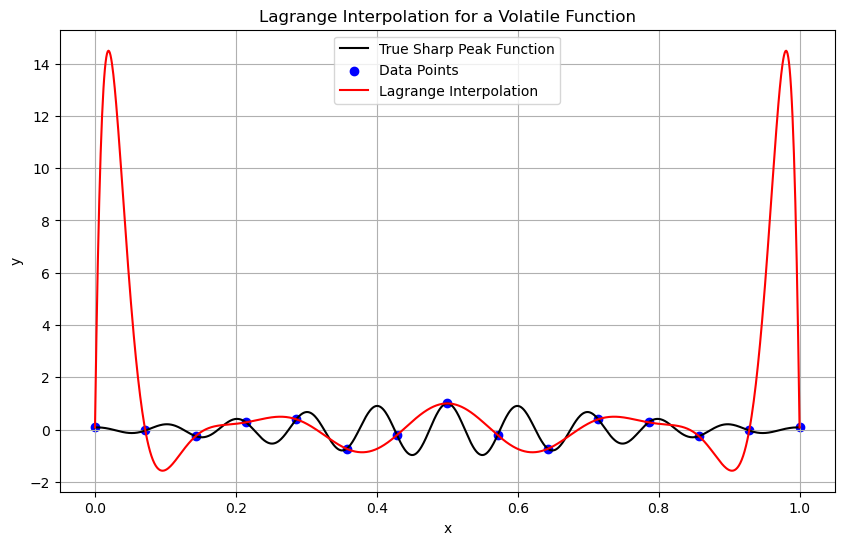

In [6]:
# Generate data points from the sharp peak function
num_points = 15
x_data = np.linspace(0, 1, num_points)
y_data = sharp_peak_function(x_data)

# Choose a range for interpolation
interp_x = np.linspace(0, 1, 1000)

# Lagrange interpolation
lagrange_poly = lagrange(x_data, y_data)
y_lagrange = lagrange_poly(interp_x)

# Plot the results
plt.figure(figsize=(10, 6))

plt.plot(interp_x, sharp_peak_function(interp_x), label="True Sharp Peak Function", color='black')
plt.scatter(x_data, y_data, label="Data Points", color='blue')

plt.plot(interp_x, y_lagrange, label="Lagrange Interpolation", color='red')

plt.title("Lagrange Interpolation for a Volatile Function")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

This was one of the best results for a Lagrange over this interval with optimal number of points chosen. We can see its generalization of the whole interval with one complex function fails to capture local behavior of highly volatile functions.

I did not plot linear interpolation, however we can clearly say that the linear approach requires smoothness for our particular case and therefore, Spline is the best choice.

## Remark

In the given above examples apart from the first example, we are changing number of points to find an optimum for the better approximation, however in reality, we have a pre-defined grid and number of points. If the number of points is very low and the true function is smooth, there might be cases when Lagrange can be better than both linear and spline, but the error difference is almost insignificant.

Given higher amount of points, we must definetly use Spline instead.

However, Lagrage interpolation can be very intuitive and easy to implement (both in code and handwritten computation), therefore it is mostly the method which is demonstrated for college students in advanced maths classes.